In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
train = pd.read_csv("data/first_innings_data.csv")
train = train.drop("Unnamed: 0",axis=1)

In [195]:
train.shape

(1717, 17)

In [193]:
train.head()

,uid,odi_type,team,opposition,toss_won,bat_first_win_prob,is_home,balls_total,stadium_id,runs,run_rate,balls_per_wicket,runs_per_wicket,year,all_out_flag,deviation_from_avg_score,win_percentage
0,3705,daynight,South-Africa,England,1,0.651163,1,300,174,204,4.080000,37.500000,25.500000,2000,0,-31,1
1,3704,day,South-Africa,England,1,0.419355,1,299,949,184,3.692308,27.181818,16.727273,2000,1,-55,0
2,3711,daynight,South-Africa,England,0,0.395349,1,270,508,149,3.311111,24.545455,13.545455,2000,1,-87,1
3,3709,daynight,England,South-Africa,0,0.454545,0,300,931,231,4.620000,42.857143,33.000000,2000,0,6,0
4,3886,day,West-Indies,England,0,0.428571,0,300,34,195,3.900000,30.000000,19.500000,2000,0,-59,1


In [178]:
train.isnull().sum()

uid                         0
odi_type                    0
team                        0
opposition                  0
toss_won                    0
bat_first_win_prob          0
is_home                     0
balls_total                 0
stadium_id                  0
runs                        0
run_rate                    0
balls_per_wicket            0
runs_per_wicket             0
year                        0
all_out_flag                0
deviation_from_avg_score    0
win_percentage              0
dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 17 columns):
uid                         1717 non-null int64
odi_type                    1701 non-null object
team                        1717 non-null object
opposition                  1717 non-null object
toss_won                    1717 non-null int64
bat_first_win_prob          1717 non-null float64
is_home                     1717 non-null int64
balls_total                 1717 non-null int64
stadium_id                  1717 non-null int64
runs                        1717 non-null int64
run_rate                    1717 non-null float64
balls_per_wicket            1717 non-null float64
runs_per_wicket             1717 non-null float64
year                        1717 non-null int64
all_out_flag                1717 non-null int64
deviation_from_avg_score    1717 non-null int64
win_percentage              1717 non-null int64
dtypes: float64(4), int64(10), object(3)
memory usage: 228.2+ KB


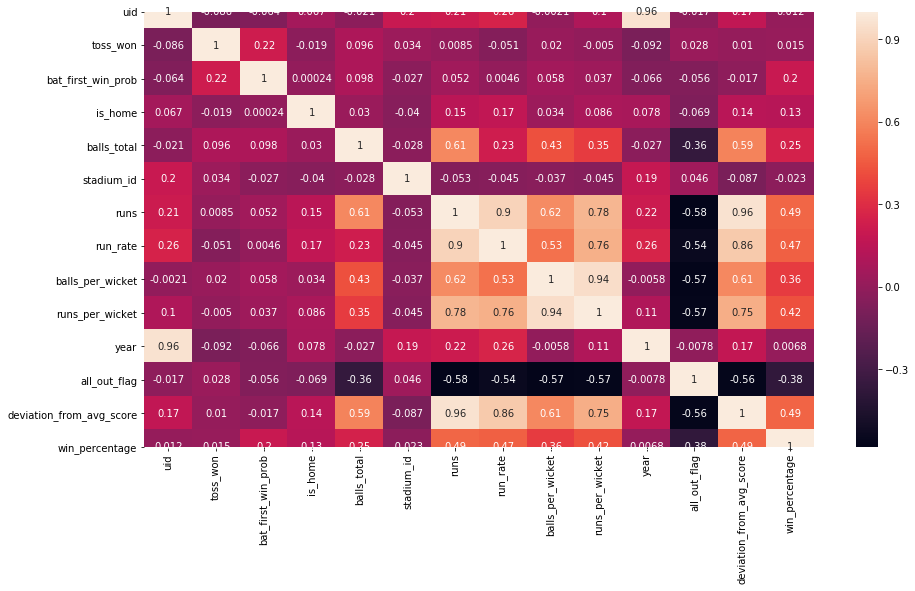

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,fmt='.2g')

In [179]:
train['binned_runs'] = pd.cut(train['runs'],bins=[0,200,250,300,1000],
                              labels=['less_than_200','200_to_250','250_to_300','more_than_300'])

In [180]:
train = pd.get_dummies(data=train,columns=['odi_type','team','opposition','binned_runs'])

In [57]:
train.head()

,uid,toss_won,bat_first_win_prob,is_home,balls_total,stadium_id,runs,run_rate,balls_per_wicket,runs_per_wicket,...,opposition_India,opposition_New-Zealand,opposition_Pakistan,opposition_South-Africa,opposition_Sri-Lanka,opposition_West-Indies,binned_runs_less_than_200,binned_runs_200_to_250,binned_runs_250_to_300,binned_runs_more_than_300
0,3705,1,0.651163,1,300,174,204,4.080000,37.500000,25.500000,...,0,0,0,0,0,0,0,1,0,0
1,3704,1,0.419355,1,299,949,184,3.692308,27.181818,16.727273,...,0,0,0,0,0,0,1,0,0,0
2,3711,0,0.395349,1,270,508,149,3.311111,24.545455,13.545455,...,0,0,0,0,0,0,1,0,0,0
3,3709,0,0.454545,0,300,931,231,4.620000,42.857143,33.000000,...,0,0,0,1,0,0,0,1,0,0
4,3886,0,0.428571,0,300,34,195,3.900000,30.000000,19.500000,...,0,0,0,0,0,0,1,0,0,0


In [58]:
train.columns

Index(['uid', 'toss_won', 'bat_first_win_prob', 'is_home', 'balls_total',
       'stadium_id', 'runs', 'run_rate', 'balls_per_wicket', 'runs_per_wicket',
       'year', 'all_out_flag', 'deviation_from_avg_score', 'win_percentage',
       'odi_type_day', 'odi_type_daynight', 'odi_type_night', 'team_Australia',
       'team_Bangladesh', 'team_England', 'team_India', 'team_New-Zealand',
       'team_Pakistan', 'team_South-Africa', 'team_Sri-Lanka',
       'team_West-Indies', 'opposition_Australia', 'opposition_Bangladesh',
       'opposition_England', 'opposition_India', 'opposition_New-Zealand',
       'opposition_Pakistan', 'opposition_South-Africa',
       'opposition_Sri-Lanka', 'opposition_West-Indies',
       'binned_runs_less_than_200', 'binned_runs_200_to_250',
       'binned_runs_250_to_300', 'binned_runs_more_than_300'],
      dtype='object')

In [181]:
train = train.drop(['uid','stadium_id','runs','year'],axis=1)

In [182]:
x_train = train.drop(['win_percentage'],axis=1)
y_train = train['win_percentage']

In [96]:
y_train

0       1
1       0
2       1
3       0
4       1
       ..
1712    1
1713    0
1714    1
1715    0
1716    1
Name: win_percentage, Length: 1717, dtype: int64

In [184]:
x_train.shape, y_train.shape

((1717, 34), (1717,))

In [183]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=3000,multi_class='ovr')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
x_train.columns

Index(['toss_won', 'bat_first_win_prob', 'is_home', 'balls_total', 'run_rate',
       'balls_per_wicket', 'runs_per_wicket', 'all_out_flag',
       'deviation_from_avg_score', 'odi_type_day', 'odi_type_daynight',
       'odi_type_night', 'team_Australia', 'team_Bangladesh', 'team_England',
       'team_India', 'team_New-Zealand', 'team_Pakistan', 'team_South-Africa',
       'team_Sri-Lanka', 'team_West-Indies', 'opposition_Australia',
       'opposition_Bangladesh', 'opposition_England', 'opposition_India',
       'opposition_New-Zealand', 'opposition_Pakistan',
       'opposition_South-Africa', 'opposition_Sri-Lanka',
       'opposition_West-Indies', 'binned_runs_less_than_200',
       'binned_runs_200_to_250', 'binned_runs_250_to_300',
       'binned_runs_more_than_300'],
      dtype='object')

In [185]:
test = pd.DataFrame(columns=x_train.columns)
test.at[0,'toss_won'] = 1
test.at[0,'bat_first_win_prob'] = 0.5
test.at[0,'is_home'] = 0
test.at[0,'balls_total'] = 300
test.at[0,'run_rate'] = 6.04
test.at[0,'balls_per_wicket'] = 50
test.at[0,'runs_per_wicket'] = 50.33
test.at[0,'all_out_flag'] = 0
test.at[0,'deviation_from_avg_score'] = 11
test.at[0,'odi_type_day'] = 0
test.at[0,'odi_type_daynight'] = 1
test.at[0,'odi_type_night'] = 0
test.at[0,'team_Australia'] = 0
test.at[0,'team_Bangladesh'] = 0
test.at[0,'team_England'] = 0
test.at[0,'team_India'] = 1
test.at[0,'team_New-Zealand'] = 0
test.at[0,'team_Pakistan'] = 0
test.at[0,'team_South-Africa'] = 0
test.at[0,'team_Sri-Lanka'] = 0
test.at[0,'team_West-Indies'] = 0
test.at[0,'opposition_Australia'] = 1
test.at[0,'opposition_Bangladesh'] = 0
test.at[0,'opposition_England'] = 0
test.at[0,'opposition_India'] = 0
test.at[0,'opposition_New-Zealand'] = 0
test.at[0,'opposition_Pakistan'] = 0
test.at[0,'opposition_South-Africa'] = 0
test.at[0,'opposition_Sri-Lanka'] = 0
test.at[0,'opposition_West-Indies'] = 0
test.at[0,'binned_runs_less_than_200'] = 0
test.at[0,'binned_runs_200_to_250'] = 0
test.at[0,'binned_runs_250_to_300'] = 0
test.at[0,'binned_runs_more_than_300'] = 1

In [88]:
test.shape

(1, 34)

In [186]:
y = model.predict_proba(test)

In [187]:
y

array([[0.56047264, 0.43952736]])

In [188]:
import pickle
pickle.dump(model,open('models/first_innings_predictor.pkl','wb'))